# 1) Rotate a Linked List

Problem Statement: Given the head of a linked list, rotate the list to the right by k places.

Examples:

Example 1:
Input:
	head = [1,2,3,4,5] 
	k = 2
Output:
 head = [4,5,1,2,3]
Explanation:
 We have to rotate the list to the right twice.
 
 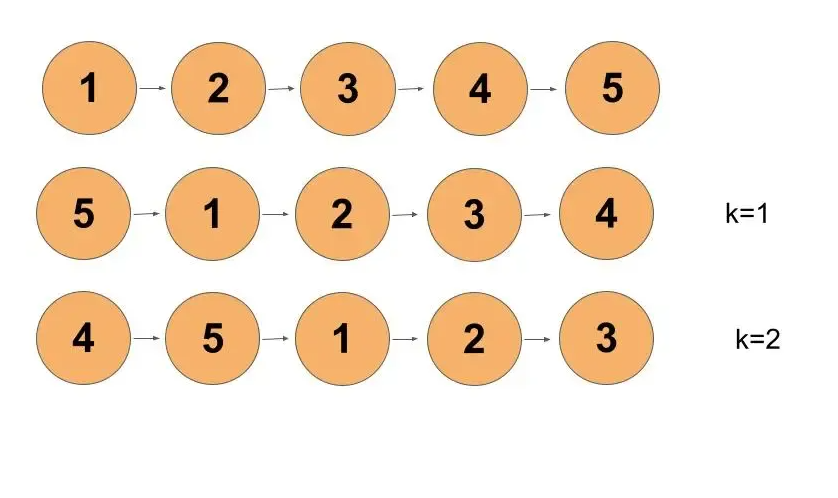


Example 2:
Input:
	head = [1,2,3]
	k = 4
Output:
head = [3,1,2]
Explanation:

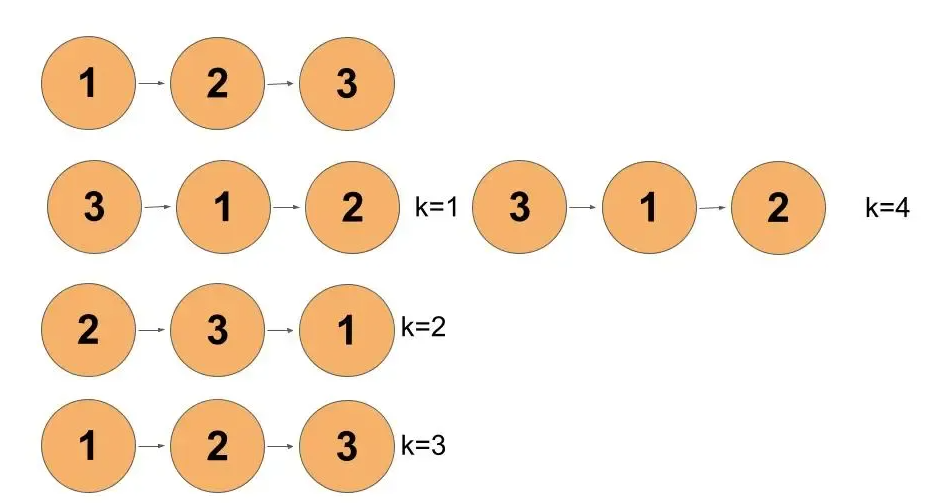


In [14]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

def find_length(head):
    res = 0
    temp = head
    while temp:
        res += 1
        temp = temp.next
    return res

def rotateLL(head, k):
    if not head or not head.next:
        return head
    
    length = find_length(head)
    target = k % length
    if target == 0:
        return head

    # Step 1: Connect last node to head
    tail = head
    while tail.next:
        tail = tail.next
    tail.next = head  # circular link

    # Step 2: Find new tail
    steps_to_new_tail = length - target
    new_tail = head
    for i in range(steps_to_new_tail - 1):
        new_tail = new_tail.next

    # Step 3: Set new head and break the loop
    new_head = new_tail.next
    new_tail.next = None

    return new_head

def printLL(head):
    temp = head
    while temp:
        print(temp.data, end="-> ")
        temp = temp.next
    print("None")

# Build linked list
head = Node(1)
node1 = Node(2)
node2 = Node(3)
node3 = Node(4)
node4 = Node(5)
head.next = node1
node1.next = node2
node2.next = node3
node3.next = node4

print("Before rotate:")
printLL(head)

# Perform rotation
head = rotateLL(head, 2)

print("After rotate:")
printLL(head)


Before rotate:
1-> 2-> 3-> 4-> 5-> None
After rotate:
4-> 5-> 1-> 2-> 3-> None


# 2) Sort a Linked List

Problem Statement: Given a linked list, sort its nodes based on the data value in them. Return the head of the sorted linked list.

Examples
                Example 1:

                Input:Linked List: 3 4 2 1 5
                


               
                Output:Sorted List: 1 2 3 4 5
                


                Explanation:  The input linked list when sorted from [3, 4, 2, 1, 5] results in a linked list with values: [1, 2, 3, 4, 5].
                
                

                Example 2:
                Input:List: 40 20 60 10 50 30
                

                
                
                Output: Sorted List: 10 20 30 40 50 60
                


                Explanation:  The input linked list when sorted from [40, 20, 60, 10, 50, 30] results in a linked list with values: [10, 20, 30, 40, 50, 60].
                
            

### Using extra array 

In [15]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

def sort_arr(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        sort_arr(left)
        sort_arr(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

    return arr


def sortLL(head):
    if not head or not head.next:
        return head

    # Step 1: Copy all node data into a list
    lst = []
    temp = head
    while temp:
        lst.append(temp.data)
        temp = temp.next

    # Step 2: Sort the list
    sort_lst = sort_arr(lst)

    # Step 3: Copy back sorted data into nodes
    temp = head
    i = 0
    while temp:
        temp.data = sort_lst[i]
        i += 1
        temp = temp.next

    return head


def printLL(head):
    temp = head
    while temp:
        print(temp.data, end=" -> ")
        temp = temp.next
    print("None")


# Example usage:
head = Node(3)
head.next = Node(4)
head.next.next = Node(2)
head.next.next.next = Node(1)
head.next.next.next.next = Node(5)

print("Before sorting:")
printLL(head)

head = sortLL(head)

print("After sorting:")
printLL(head)


Before sorting:
3 -> 4 -> 2 -> 1 -> 5 -> None
After sorting:
1 -> 2 -> 3 -> 4 -> 5 -> None


### optimal approach with out using array

In [16]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next


def merge(l1, l2):
    dummy = Node(0)
    tail = dummy

    while l1 and l2:
        if l1.data < l2.data:
            tail.next = l1
            l1 = l1.next
        else:
            tail.next = l2
            l2 = l2.next
        tail = tail.next

    if l1:
        tail.next = l1
    if l2:
        tail.next = l2

    return dummy.next


def sort_list(head):
    if not head or not head.next:
        return head

    # Step 1: Find middle to split list
    def find_middle(head):
        slow, fast = head, head.next
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
        return slow

    mid = find_middle(head)
    right_head = mid.next
    mid.next = None  # Split into two halves
    
#   1->2->3->None >>>>> left half...... 4->5->None >>>> right half

    # Step 2: Recursively sort both halves
    left_sorted = sort_list(head)
    right_sorted = sort_list(right_head)

    # Step 3: Merge sorted halves
    return merge(left_sorted, right_sorted)


def print_list(head):
    temp = head
    while temp:
        print(temp.data, end=" -> ")
        temp = temp.next
    print("None")


# Example usage:
head = Node(3)
head.next = Node(4)
head.next.next = Node(2)
head.next.next.next = Node(1)
head.next.next.next.next = Node(5)

print("Before sorting:")
print_list(head)

head = sort_list(head)

print("After sorting:")
print_list(head)


Before sorting:
3 -> 4 -> 2 -> 1 -> 5 -> None
After sorting:
1 -> 2 -> 3 -> 4 -> 5 -> None


# 2) Flattening Linked List

Problem Statement: Given a linked list containing ‘N’ head nodes where every node in the linked list contains two pointers:

‘Next’ points to the next node in the list
‘Child’ pointer to a linked list where the current node is the head
Each of these child linked lists is in sorted order and connected by a 'child' pointer. Your task is to flatten this linked list such that all nodes appear in a single layer or level in a 'sorted order'

Examples
Example 1:

Input:

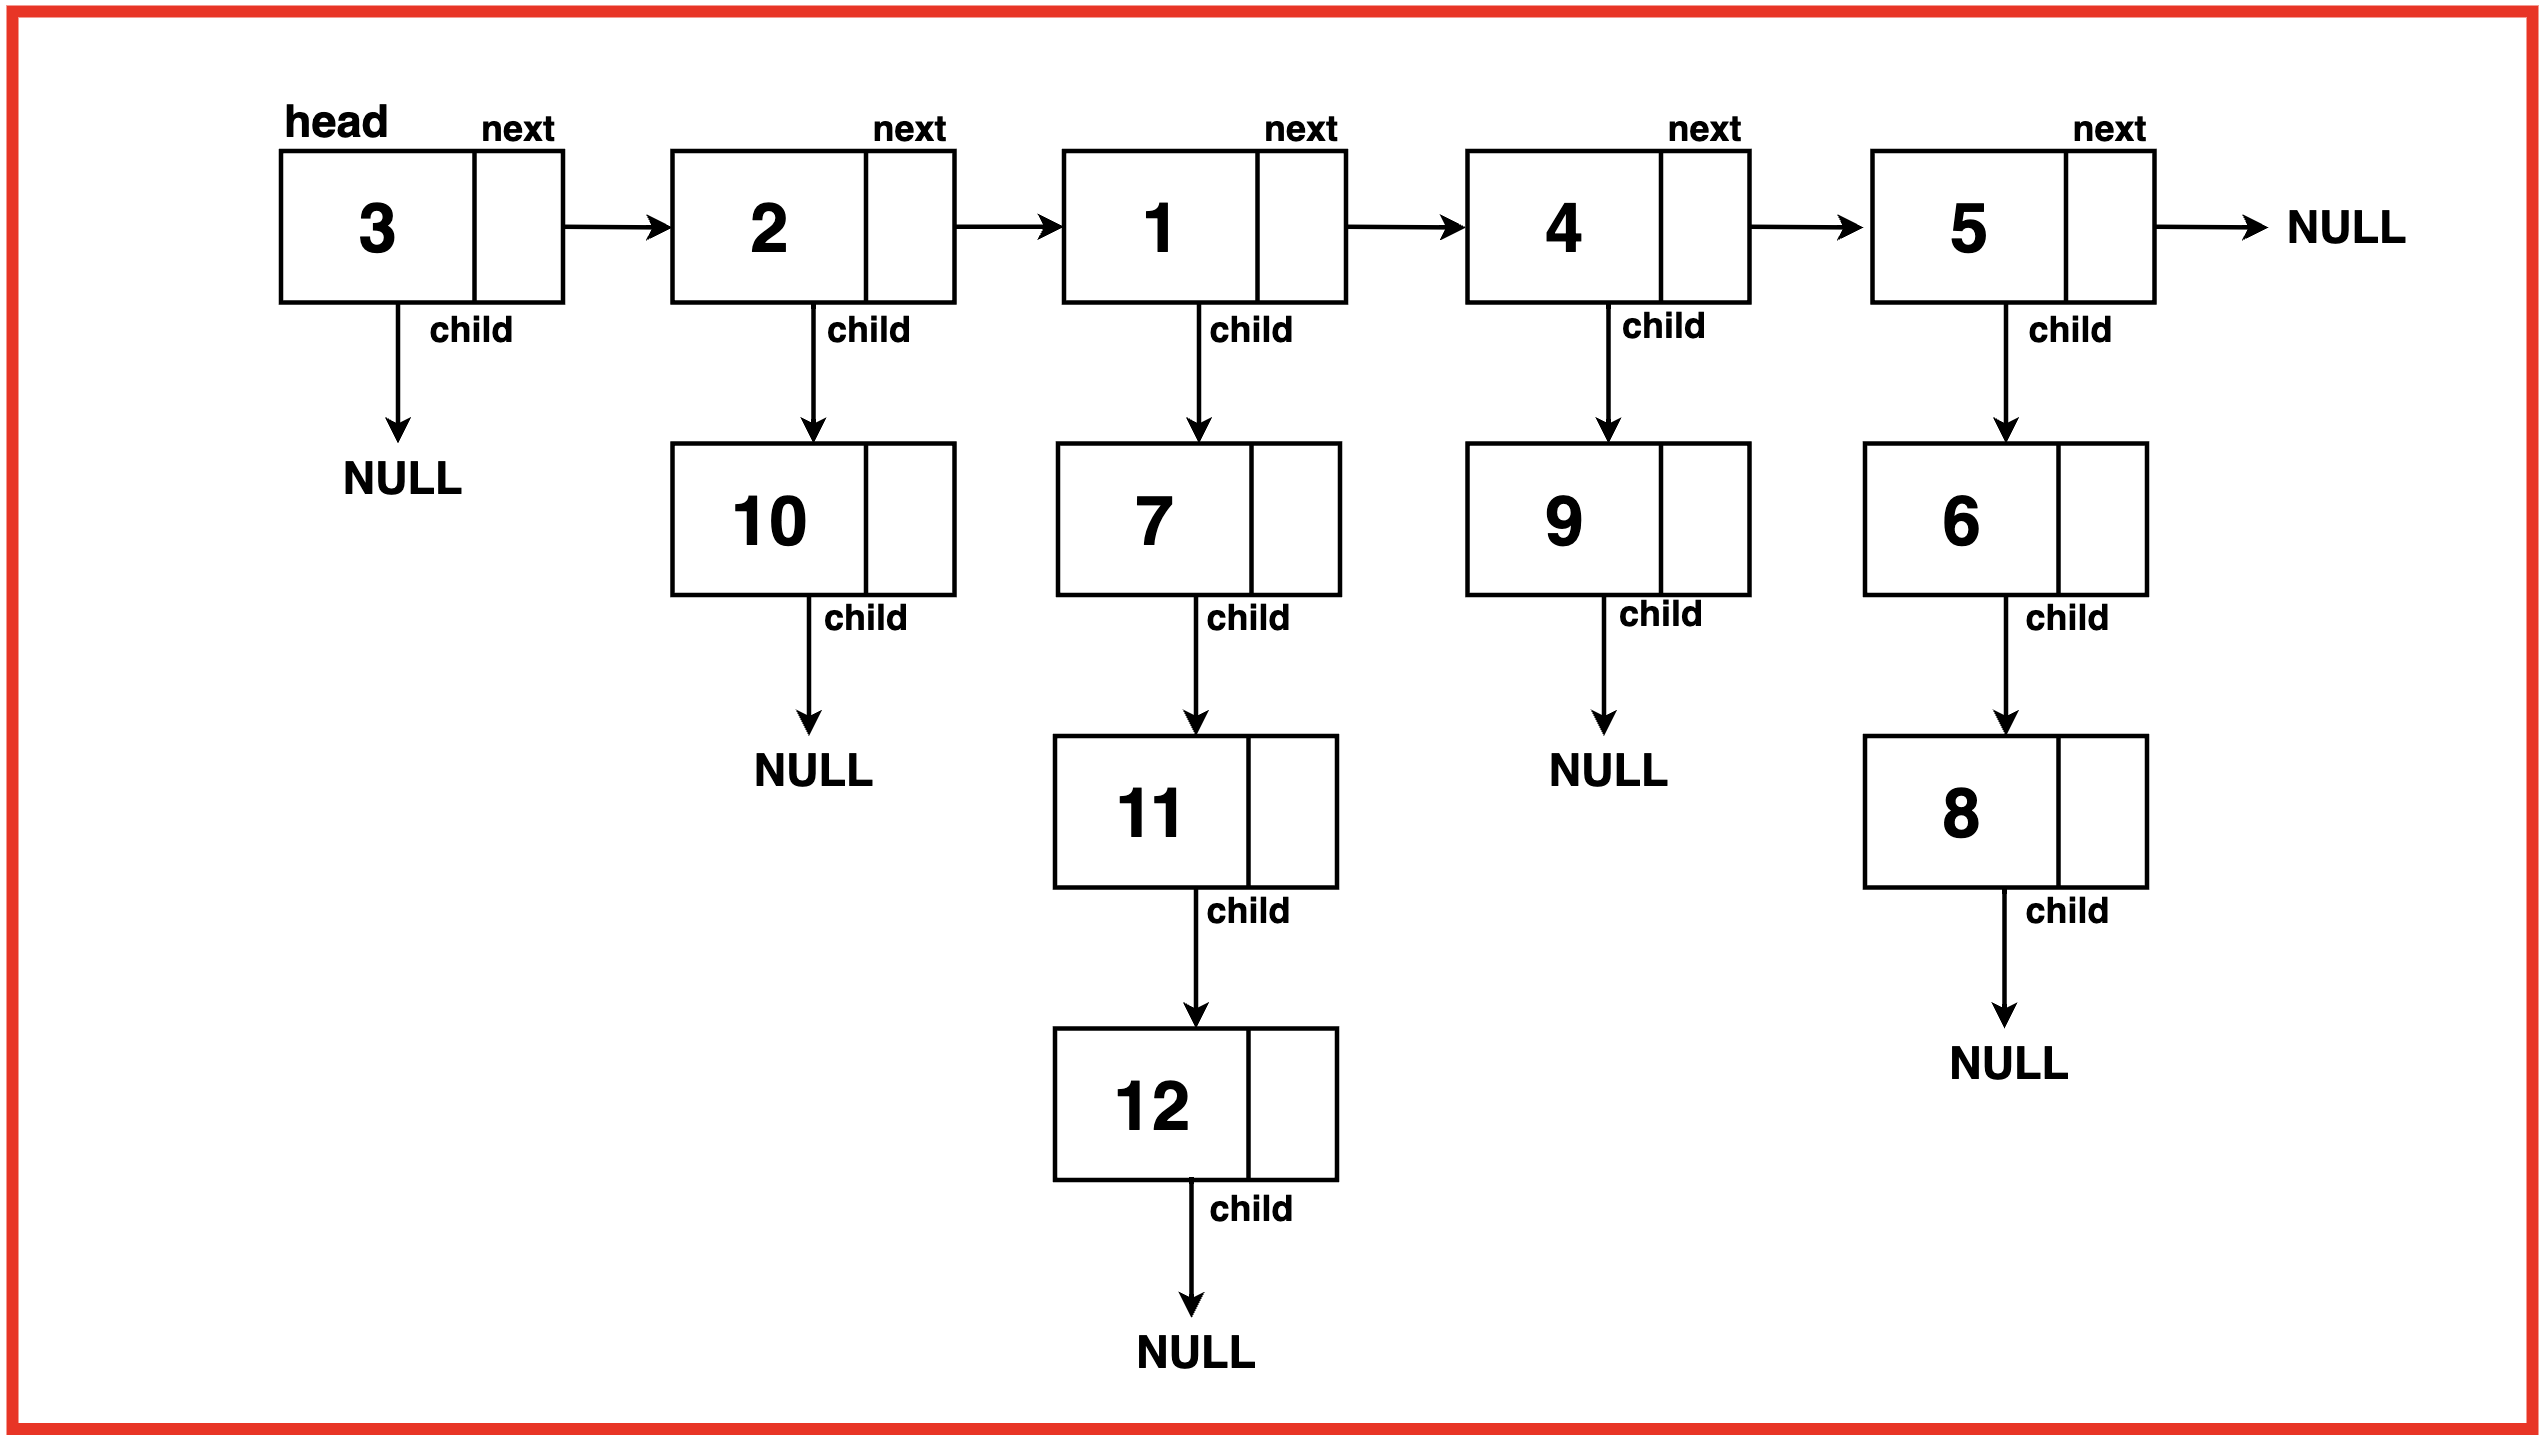

 Output:1 2 3 4 5 6 7 8 9 10 11 12

 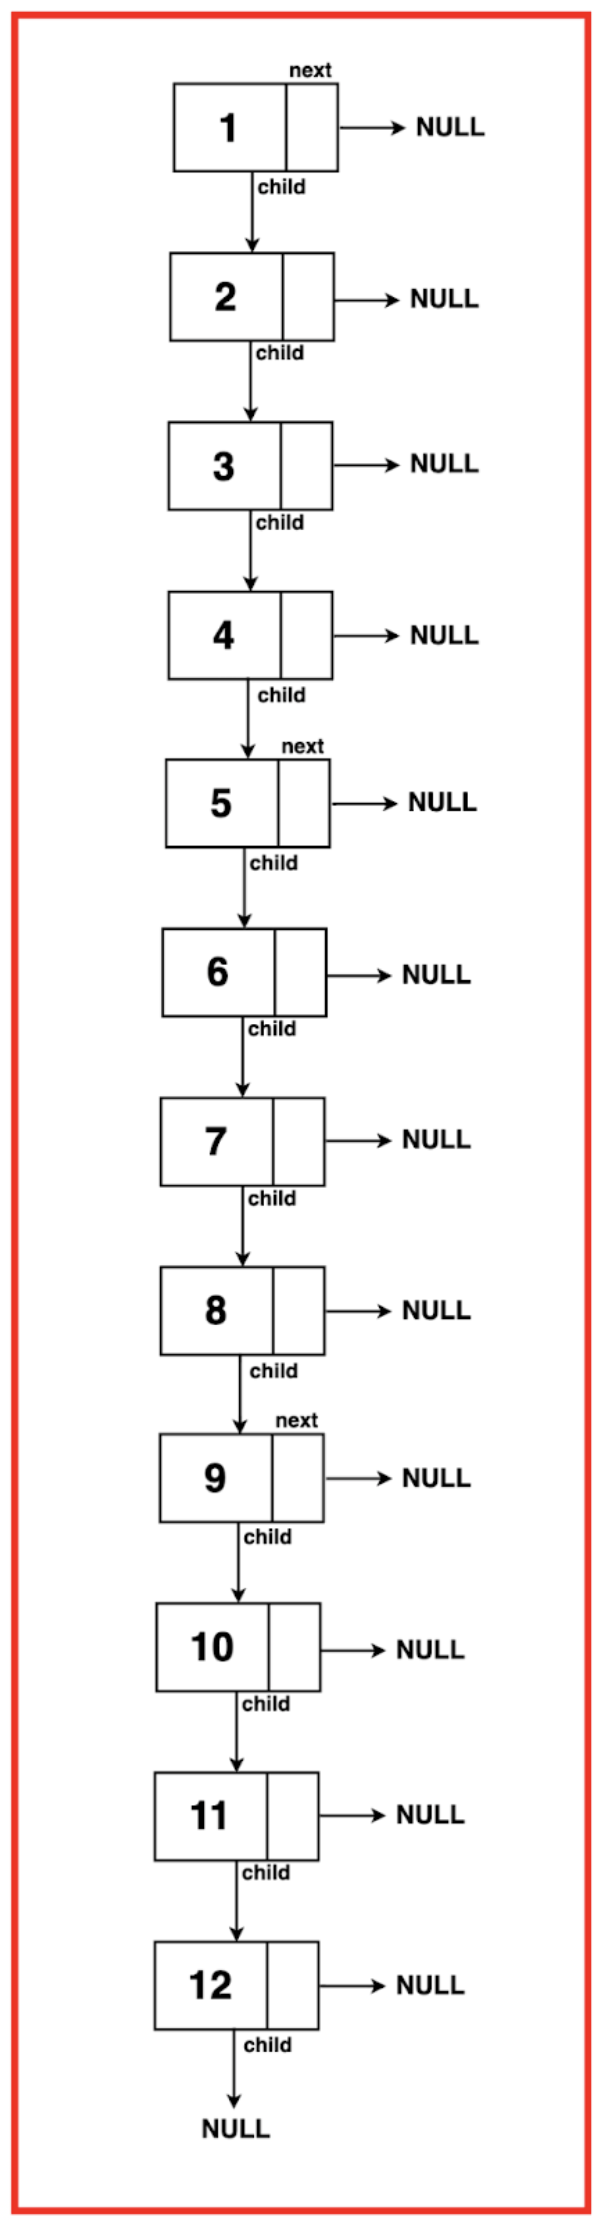

 Explanation: Flatten the linked list into a single level sorted order and traverse the nodes in such a manner that the child linked lists are merged into the main list in the sorted order.

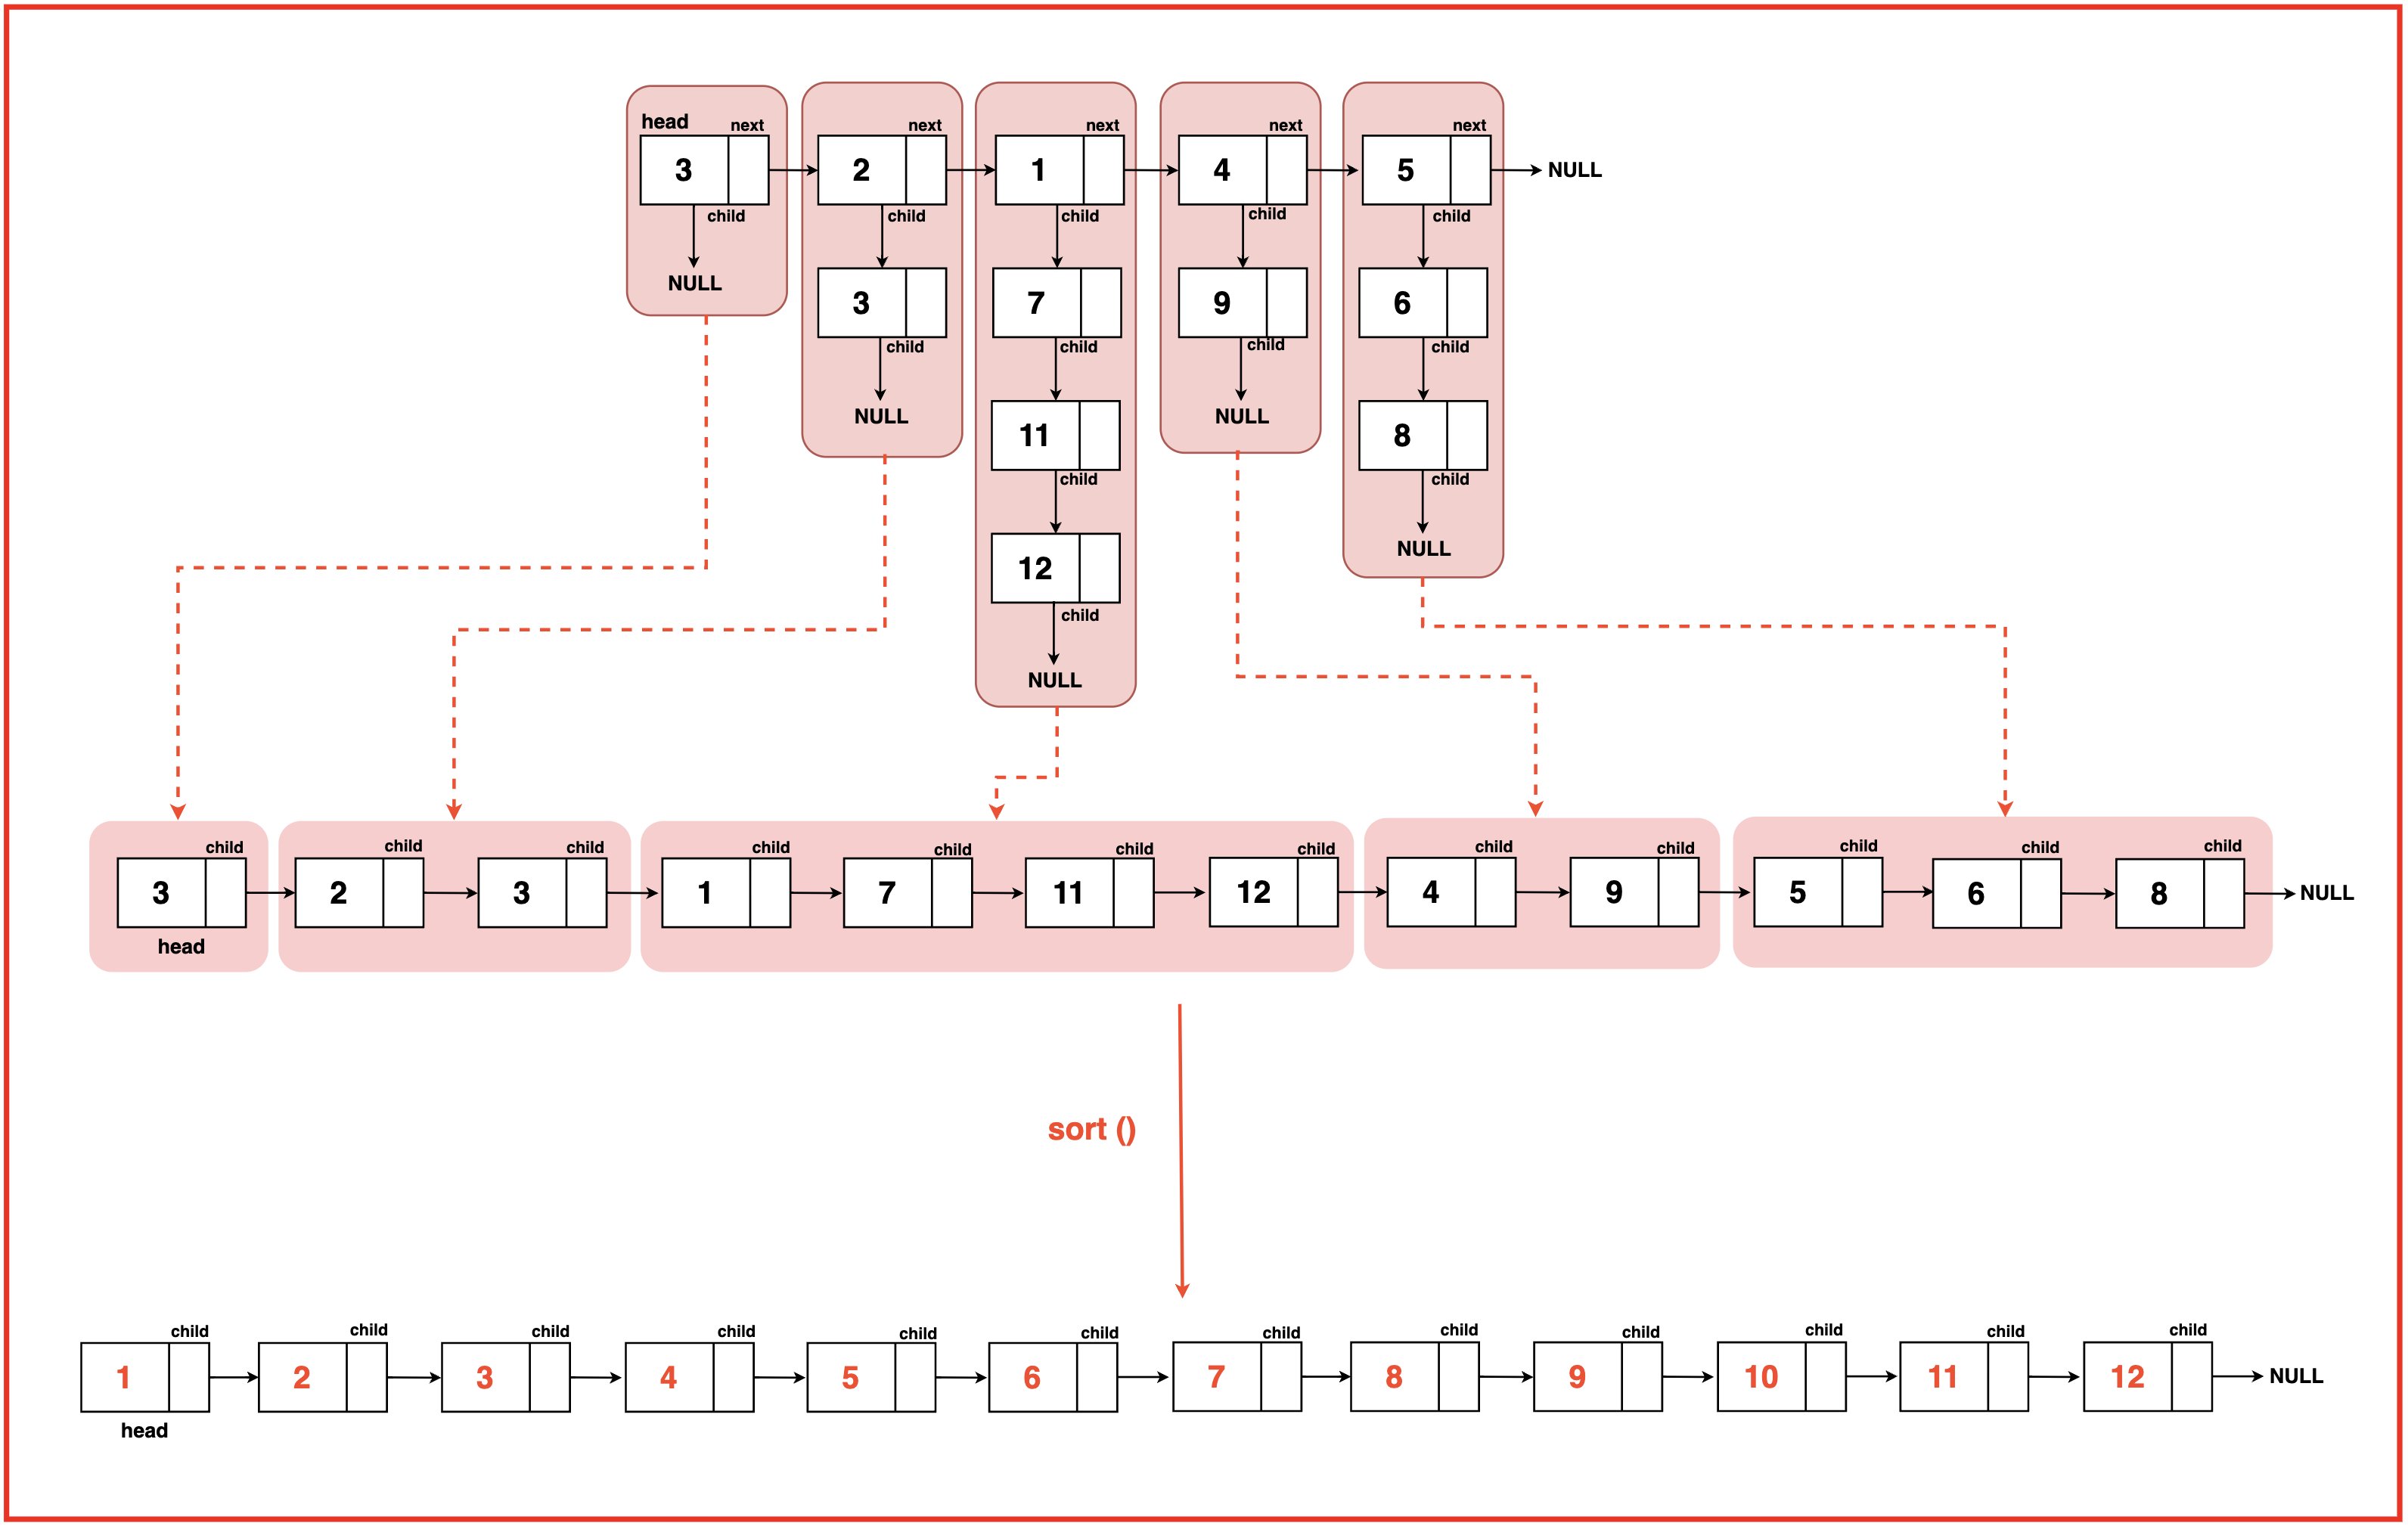


Example 2:
Input:

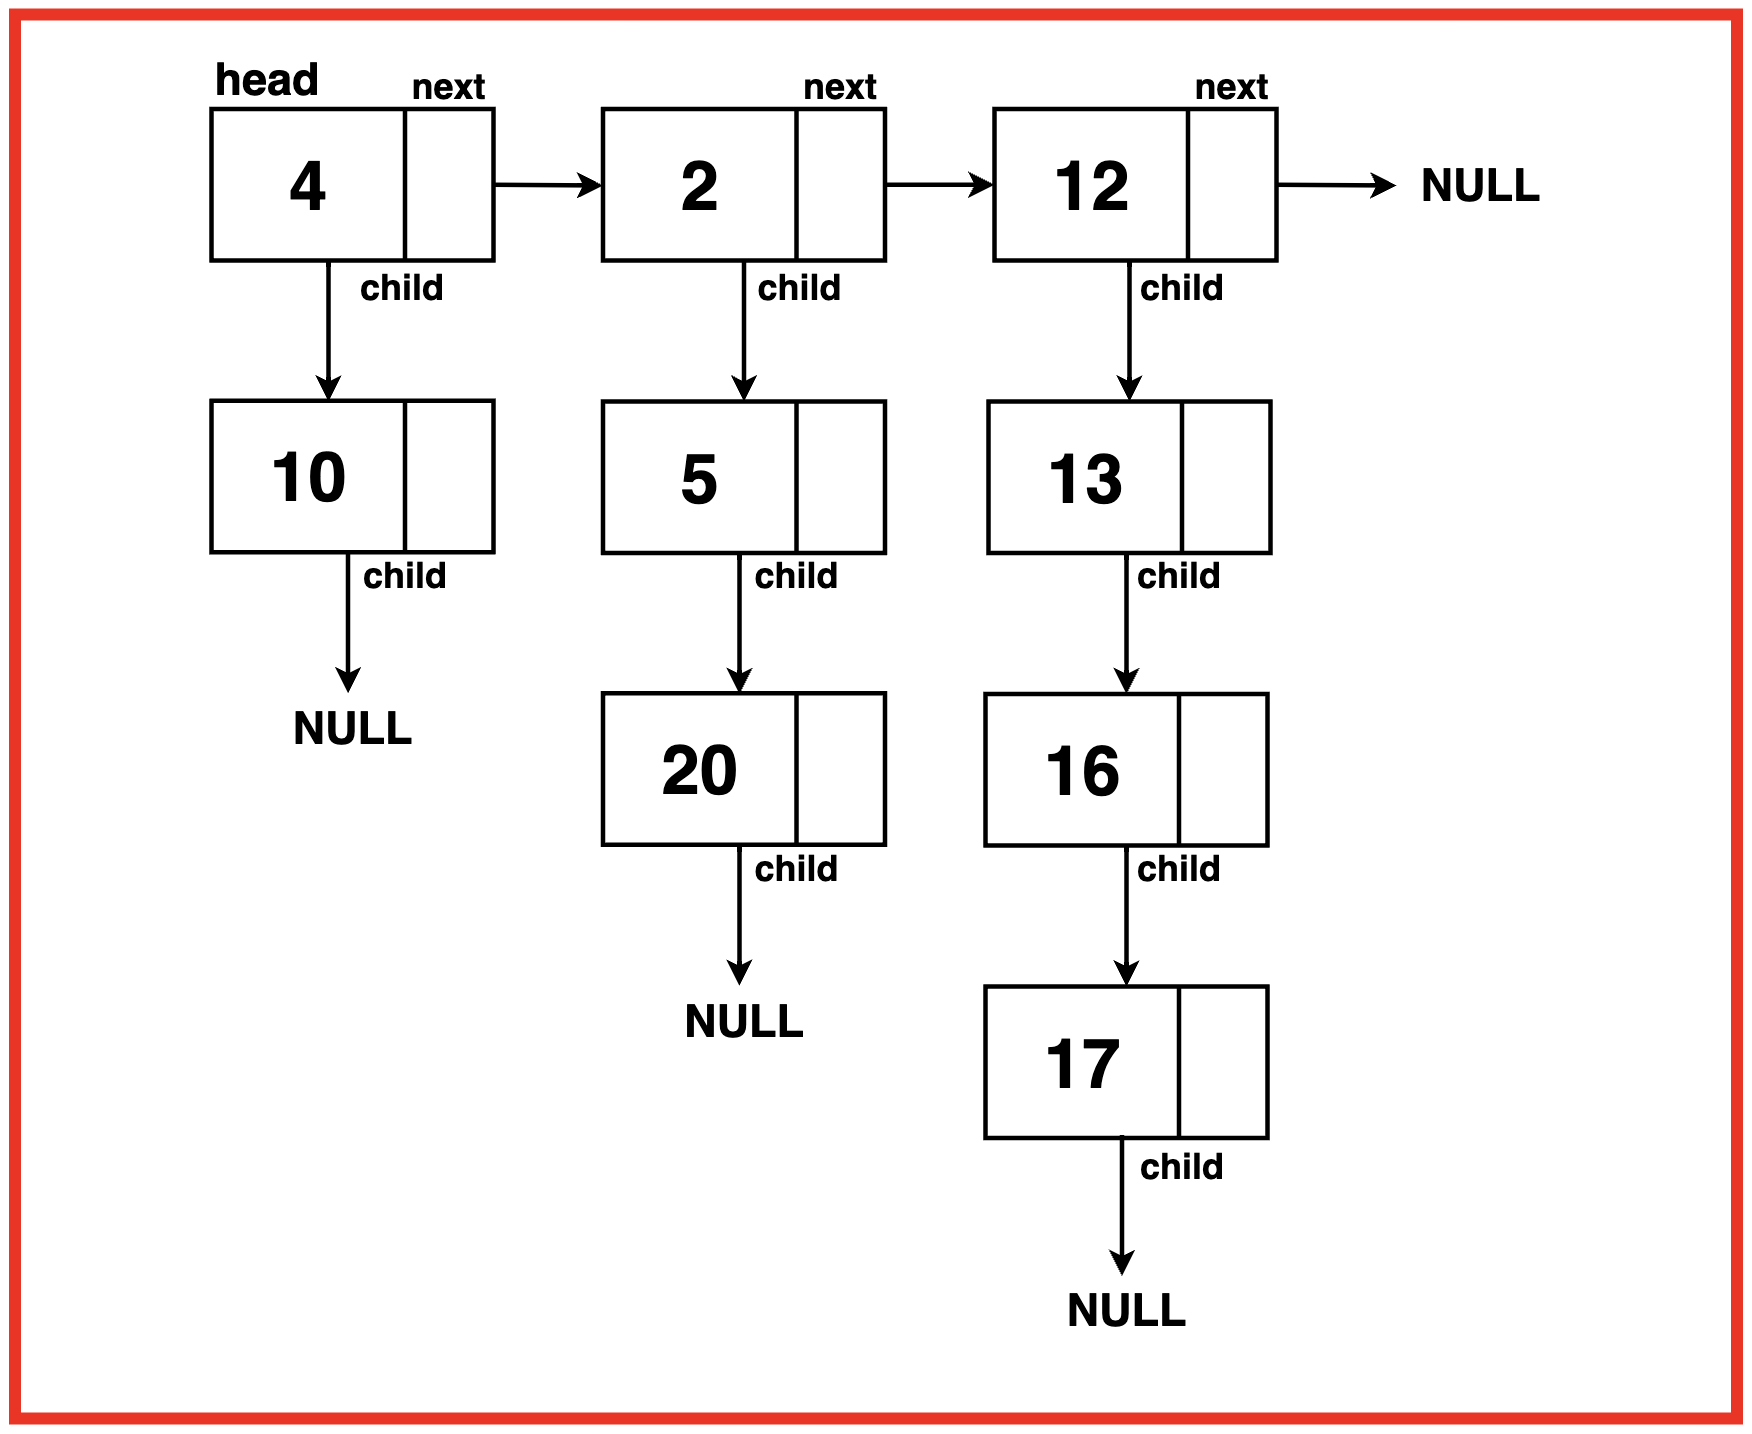

Output: 2 4 5 10 12 13 16 17 20

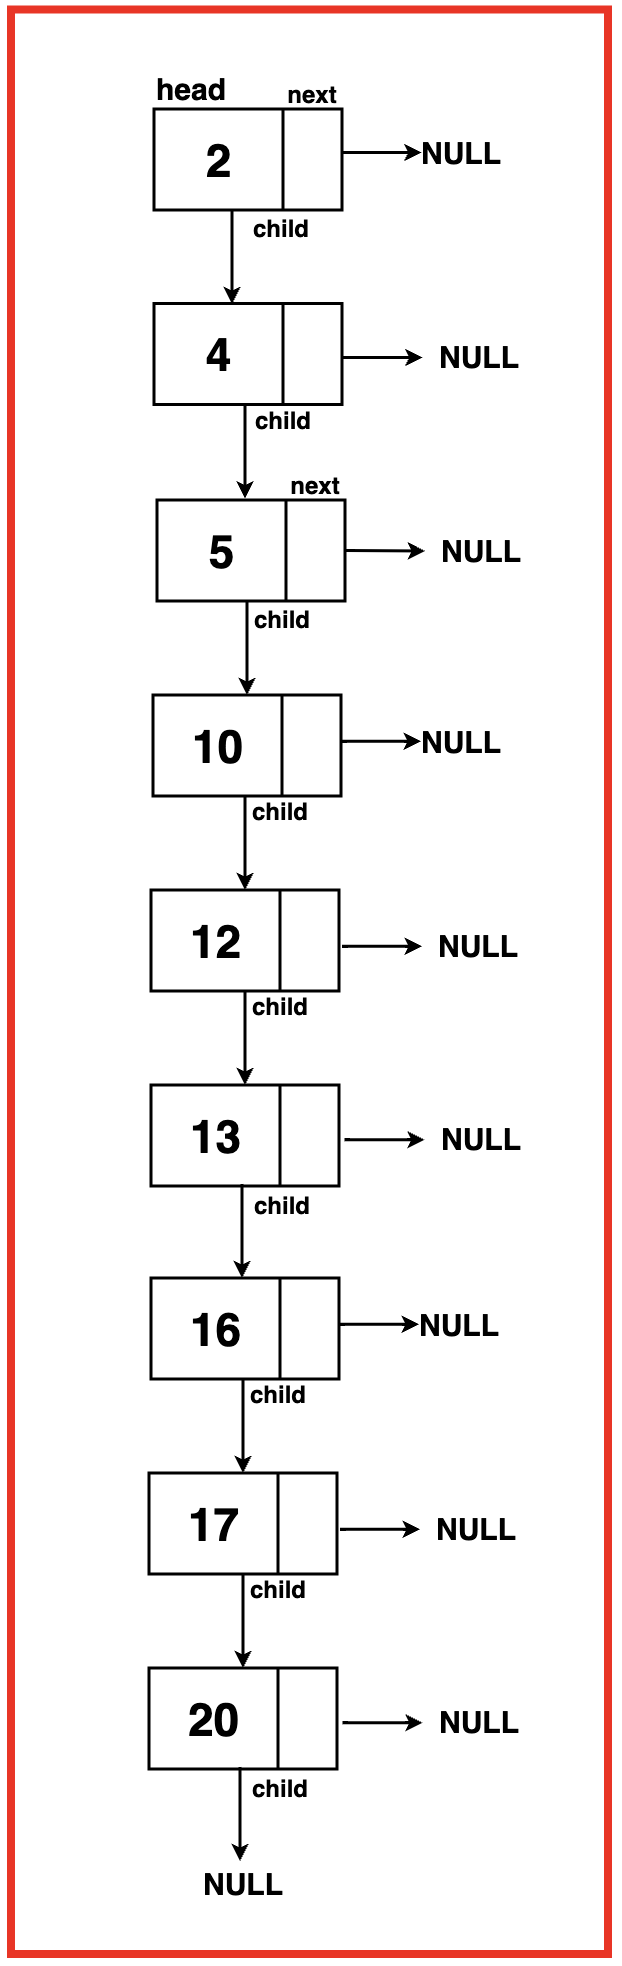

 Explanation: 

 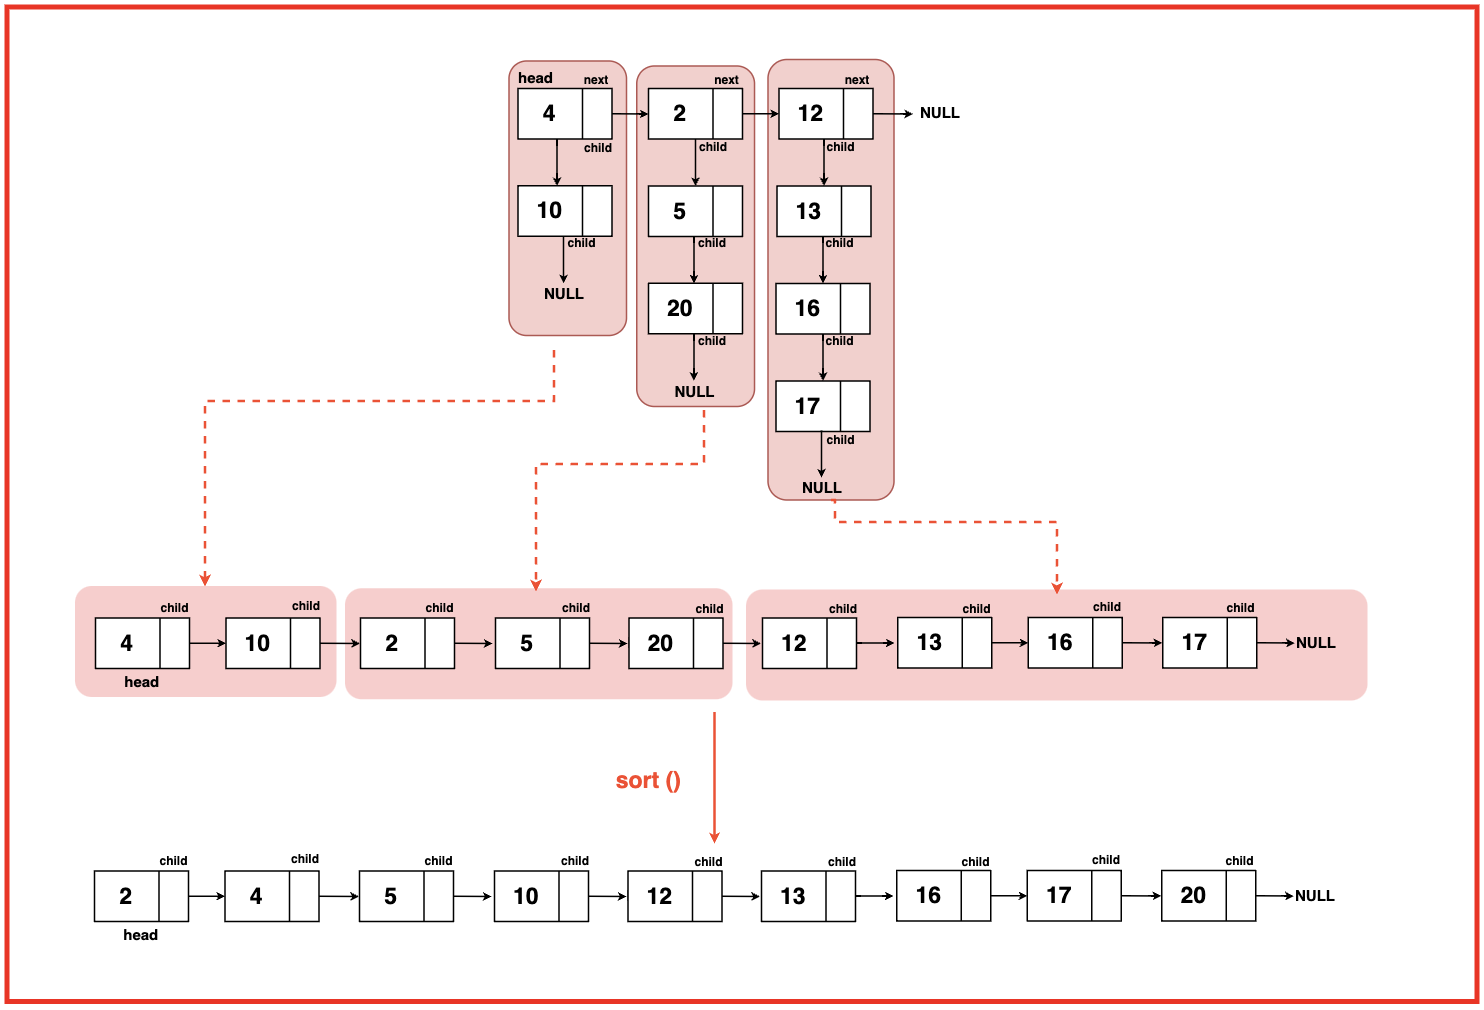


In [3]:
class Node:
    def __init__(self,data):
        self.data = data
        self.next = None
        self.child = None
        
def merge(a,b):
    ## if one list is empty, return the other
    if not a:
        return b
    
    if not b:
        return a
    
    ## pick the smaller value
    if a.data < b.data:
        result = a
        result.child = merge(a.child,b)
        
    else:
        result = b
        result.child = merge(a, b.child)
        
    result.next = None  ## Important: remove "next" link
    return result

def flatten(root):
    if not root or not root.next:
#         print(root.data)
        return root
    
    ## flatten the list on right
    root.next = flatten(root.next)
    
    ## merge current list with the next flattend list
    root = merge(root,root.next)
    
    return root

def printList(node):
    while node:
        print(node.data,end=" ")
        node = node.child
        




In [4]:
# Constructing example:
head = Node(5)
head.next = Node(10)
head.next.next = Node(19)
head.next.next.next = Node(28)

head.child = Node(7)
head.child.child = Node(8)

head.next.child = Node(20)

head.next.next.child = Node(22)
head.next.next.child.child = Node(50)

head.next.next.next.child = Node(35)
head.next.next.next.child.child = Node(40)
head.next.next.next.child.child.child = Node(45)

flat = flatten(head)
printList(flat)


28
5 7 8 10 19 20 22 28 35 40 45 50 